<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/dfPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data={
    'bebida':['Cafe','Soda','Te','Cerveza'],
    'precio':[10,12,9,15]
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,bebida,precio
0,Cafe,10
1,Soda,12
2,Te,9
3,Cerveza,15


In [ ]:
df=pd.DataFrame(data,index=['Juan','Pedro','Ana','Cecilia'])
df

,bebida,precio
Juan,Cafe,10
Pedro,Soda,12
Ana,Te,9
Cecilia,Cerveza,15


In [ ]:
df.loc['Ana']

bebida    Te
precio     9
Name: Ana, dtype: object

In [ ]:
df=pd.read_csv('purchases.csv')
df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


In [ ]:
df=pd.read_csv('purchases.csv',index_col=0)
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [ ]:
df=pd.read_json('purchases.json')
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect("database.db")

In [ ]:
df = pd.read_sql_query("SELECT * FROM purchases", con)
df

,index,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


In [ ]:
df.set_index('index')

,apples,oranges
index,,
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [ ]:
df.to_csv('archivo.csv')

In [ ]:
df.to_json('archivo.json')

In [ ]:
df.to_excel('archivo.xlsx')

In [ ]:
df.to_sql('nuevo',con)

In [ ]:
df2=pd.read_sql_query("SELECT * FROM nuevo", con)

In [ ]:
movies_df = pd.read_csv("sample_data/IMDB-Movie-Data.csv", index_col="Title")
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
movies_df.tail(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


In [ ]:
movies_df=movies_df.append(movies_df.head(10))

In [ ]:
movies_df.shape

(1010, 11)

In [ ]:
movies_df=movies_df.drop_duplicates()
movies_df.shape

(1000, 11)

In [ ]:
movies_df.drop_duplicates(inplace=True,keep='first')
movies_df.shape

(1000, 11)

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
movies_df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
},inplace=True)

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [ ]:
movies_df.isnull()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [ ]:
movies_df.dropna(inplace=True)
movies_df.shape

(838, 11)

In [ ]:
import pandas as pd
movies_df = pd.read_csv("sample_data/IMDB-Movie-Data.csv", index_col="Title")
movies_df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
},inplace=True)

In [ ]:
revenue = movies_df['Revenue_millions']

In [ ]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_millions, dtype: float64

In [ ]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678897

In [ ]:
revenue.fillna(revenue_mean,inplace=True)

In [ ]:
movies_df.isnull().sum()

Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue_millions     0
Metascore           64
dtype: int64

In [ ]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [ ]:
movies_df['Genre'].value_counts()

Action,Adventure,Sci-Fi     50
Drama                       48
Comedy,Drama,Romance        35
Comedy                      32
Drama,Romance               31
                            ..
Comedy,Family,Fantasy        1
Mystery,Thriller,Western     1
Drama,Thriller,War           1
Biography,Drama,Family       1
Action,Horror                1
Name: Genre, Length: 207, dtype: int64

In [ ]:
movies_df.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [ ]:
p=movies_df.loc['Prometheus']
p

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [ ]:
p=movies_df.iloc[1]
p

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [ ]:
movies_subset=movies_df.loc['Prometheus':'Sing']
movies_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
movies_subset=movies_df.iloc[1:4]
movies_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
Ridley=movies_df['Director']=='Ridley Scott'
Ridley.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: Director, dtype: bool

In [ ]:
movies_df[movies_df['Director']=='Ridley Scott']

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [ ]:
movies_df[movies_df['Rating']>8.5].head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [ ]:
movies_df[(movies_df['Director']=='Ridley Scott') &
          (movies_df['Rating']>8.5)]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,


In [ ]:
movies_df[
          (movies_df['Year']>=2005)&(movies_df['Year']<=2010)&
          (movies_df['Rating']>8)&
          (movies_df['Revenue_millions']<movies_df['Revenue_millions'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [ ]:
def rating(x):
  if x>=8.0:
    return "Good"
  else:
    return "Bad"

In [ ]:
movies_df['rating_category']=movies_df['Rating'].apply(rating)
movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Bad


In [ ]:
movies_df['rating_category']=movies_df['Rating'].apply(
    lambda x:'Good' if x>8.0 else 'Bad'
)
movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Bad


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

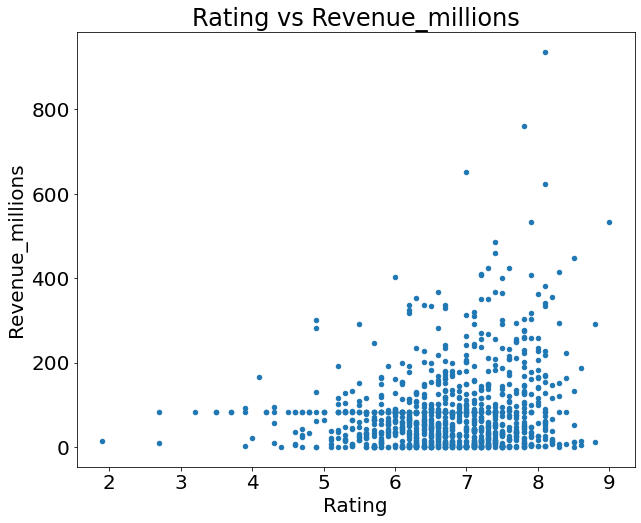

In [ ]:
movies_df.plot(
    kind='scatter',
    x='Rating',y='Revenue_millions',
    title='Rating vs Revenue_millions'
    );

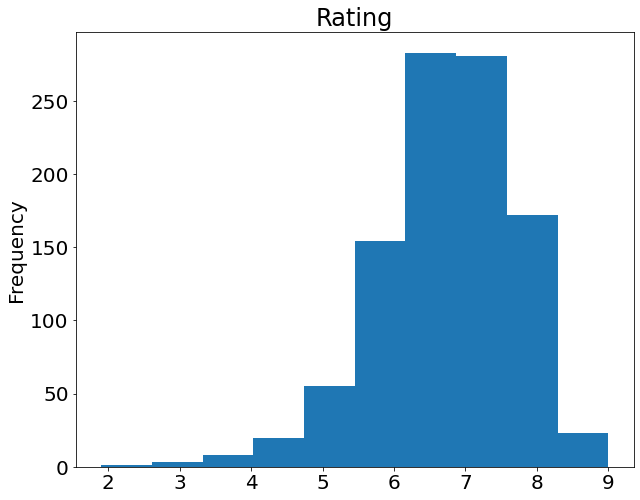

In [ ]:
movies_df['Rating'].plot(kind='hist',title='Rating');

In [ ]:
movies_df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

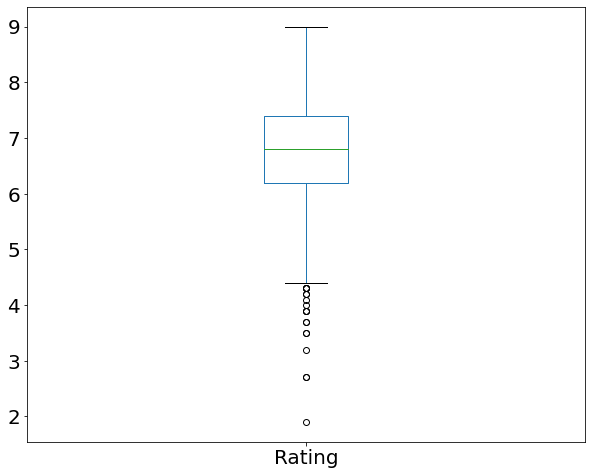

In [ ]:
movies_df['Rating'].plot(kind='box');

In [ ]:
6.8*1.5

10.2

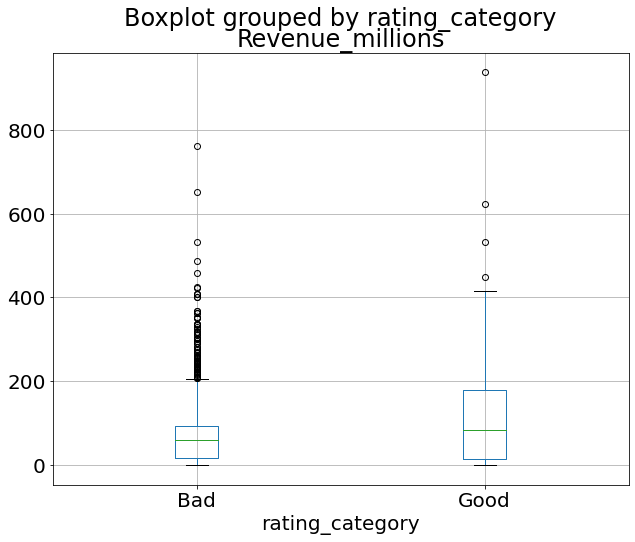

In [ ]:
movies_df.boxplot(column='Revenue_millions',by='rating_category');

In [ ]:
pd.pivot_table(movies_df,index=['Director','Year'],values=['Rating'],aggfunc=np.sum)

Rating
Director            Year        
Aamir Khan          2007     8.5
Abdellatif Kechiche 2013     7.8
Adam Leon           2016     6.5
Adam McKay          2006     6.6
                    2008     6.9
...                          ...
Zack Snyder         2009     7.6
                    2011     6.1
                    2013     7.1
                    2016     6.7
Zackary Adler       2015     5.1

[987 rows x 1 columns]

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('sample_data/sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.style.highlight_null().render().split('\n')[:10]

['<style  type="text/css" >',
 '</style><table id="T_0a3c8c82_1aee_11eb_8f86_0242ac1c0002" ><thead>    <tr>        <th class="blank level0" ></th>        <th class="col_heading level0 col0" >Account</th>        <th class="col_heading level0 col1" >Name</th>        <th class="col_heading level0 col2" >Rep</th>        <th class="col_heading level0 col3" >Manager</th>        <th class="col_heading level0 col4" >Product</th>        <th class="col_heading level0 col5" >Quantity</th>        <th class="col_heading level0 col6" >Price</th>        <th class="col_heading level0 col7" >Status</th>    </tr></thead><tbody>',
 '                <tr>',
 '                        <th id="T_0a3c8c82_1aee_11eb_8f86_0242ac1c0002level0_row0" class="row_heading level0 row0" >0</th>',
 '                        <td id="T_0a3c8c82_1aee_11eb_8f86_0242ac1c0002row0_col0" class="data row0 col0" >714466</td>',
 '                        <td id="T_0a3c8c82_1aee_11eb_8f86_0242ac1c0002row0_col1" class="data row0 col1" >

In [ ]:
def marca_maximos(frame):
  maximo= frame==frame.max()
  return ['background-color: yellow' if v else '' for v in maximo]

def marca_minimos(frame):
  minimo= frame==frame.min()
  return ['color: red' if v else '' for v in minimo]

In [ ]:
df.style.apply(marca_maximos,subset=['Price','Quantity'])

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
df.style.apply(marca_maximos,subset=['Price','Quantity']).\
apply(marca_minimos,subset=['Price','Quantity'])

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
df.style.apply(marca_maximos,subset=['Price','Quantity']).\
apply(marca_minimos,subset=['Price','Quantity']).\
to_excel('sample_data/conformato.xlsx')

In [ ]:
df.style.apply(marca_maximos,subset=pd.IndexSlice[5:10,['Price','Quantity']])

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
df.style.format({'Price': "${:20,.0f}"}).\
background_gradient(subset=['Quantity'],cmap='Blues').\
bar(subset=["Price"], color='lightgreen')

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,"$ 30,000",presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,"$ 10,000",presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,"$ 5,000",pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,"$ 35,000",declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,"$ 65,000",won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,"$ 40,000",pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,"$ 10,000",presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,"$ 5,000",pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,"$ 35,000",declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,"$ 65,000",won


In [ ]:
df.style.format({'Price': "${:20,.0f}"}).\
background_gradient(subset=['Quantity'],cmap='Blues').\
bar(subset=["Price"], color='lightgreen').to_excel('sample_data/conformato.xlsx')

In [ ]:
df.style.background_gradient(subset=['Price'],cmap='Greens')

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
df.style.background_gradient(subset=['Price'],cmap='Greens').\
to_excel('sample_data/conformato.xlsx')

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
df = pd.read_excel("salesfunnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [2]:
sales_report = pd.pivot_table(df, index=["Manager", "Rep", "Product"], values=["Price", "Quantity"],
                           aggfunc=[np.sum, np.mean], fill_value=0)
sales_report.head()

sum            mean         
                                         Price Quantity  Price Quantity
Manager      Rep           Product                                     
Debra Henley Craig Booker  CPU           65000        2  32500      1.0
                           Maintenance    5000        2   5000      2.0
                           Software      10000        1  10000      1.0
             Daniel Hilton CPU          105000        4  52500      2.0
                           Software      10000        1  10000      1.0

In [3]:
print(df[df["Product"]=="CPU"]["Quantity"].mean())
print(df[df["Product"]=="CPU"]["Price"].mean())
print(df[df["Product"]=="Software"]["Quantity"].mean())
print(df[df["Product"]=="Software"]["Price"].mean())

1.8888888888888888
51666.666666666664
1.0
10000.0


In [26]:
def get_summary_stats(df,product):
    """
    For certain products we want National Summary level information on the reports
    Return a list of the average quantity and price
    """
    results = []
    results.append(df[df["Product"]==product]["Quantity"].mean())
    results.append(df[df["Product"]==product]["Price"].mean())
    return results

In [27]:
manager_df = []
for manager in sales_report.index.get_level_values(0).unique():
    manager_df.append([manager, sales_report.xs(manager, level=0).to_html()])

In [29]:
from jinja2 import Environment, FileSystemLoader
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html")
template_vars = {"title" : "Sales Funnel Report - National",
                 "national_pivot_table": sales_report.to_html()}
# Render our file and create the PDF using our css style file
html_out = template.render(template_vars)               

In [8]:
!pip install weasyprint

     |████████████████████████████████| 368kB 4.1MB/s 
     |████████████████████████████████| 1.9MB 8.2MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89552 sha256=9c86530844794452ccb09685405733d98b21d16d14c52467ff74007b7ff69a9f
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [30]:
from weasyprint import HTML
HTML(string=html_out).write_pdf("report.pdf")

In [31]:
HTML(string=html_out).write_pdf("report3.pdf", stylesheets=["style.css"])